<a href="https://colab.research.google.com/github/prabindh/ctsoc-stdu/blob/main/PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

In [ ]:
!pip install layoutparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.8 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31529 sha256=fcece5f2a76bf16357207c9977e3427837fe85bb23a4edf80e95f4662b2277ba
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath


In [ ]:
!pip install "layoutparser[effdet]"

In [ ]:
!pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-179uvj_k/detectron2_40e17ed101a643f3bd53a27f0d2ec463
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-179uvj_k/detectron2_40e17ed101a643f3bd53a27f0d2ec463
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.5-cp310-cp310-linux_x86_64

In [ ]:
!pip install paddleocr
!python -m pip install paddlepaddle-gpu==2.5.0.post118 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html


In [ ]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

config.yml?dl=1: 8.19kB [00:01, 6.90kB/s]
model_final.pth?dl=1: 330MB [00:04, 68.1MB/s]                           
/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on G

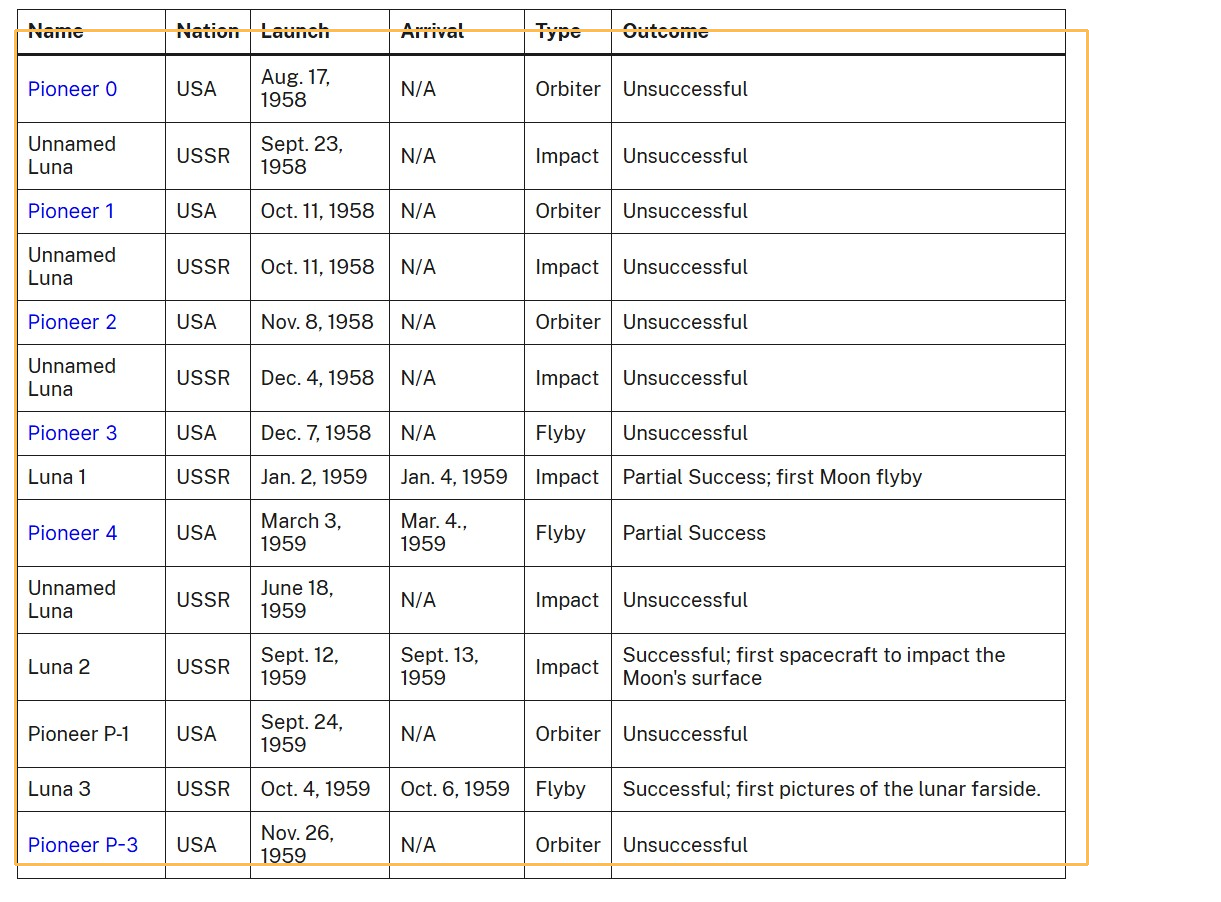

In [ ]:
import cv2
import layoutparser as lp
image = cv2.imread("/content/testcase 11.jpg")

image = image[..., ::-1]

# # load model
# model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
#                                 threshold=0.5,
#                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
#                                 enforce_cpu=False,
#                                 enable_mkldnn=True)#math kernel library
# # detect
# layout = model.detect(image)

import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image)
lp.draw_box(image, layout, box_width=3)


In [ ]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=15.061848640441895, y_1=30.90460777282715, x_2=1087.8507080078125, y_2=864.8987426757812), text=None, id=None, type=Figure, parent=None, next=None, score=0.8683801889419556)], page_data={})

In [ ]:
x_1=15.061951637268066
y_1=30.904644012451172
x_2=1087.850830078125
y_2=864.8988037109375



for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break
    print(x_1,y_1,x_2,y_2)

In [ ]:
im = cv2.imread('/content/testcase 11.jpg')
cv2.imwrite('extracted_im.jpg', im[int(y_1):int(y_2), int(x_1):int(x_2)])


True

In [ ]:
!pip install paddleocr
!python -m pip install paddlepaddle-gpu==2.5.0.post118 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python -m pip install paddlepaddle-gpu==2.4.1.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

!git clone https://github.com/PaddlePaddle/PaddleOCR.git
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install --upgrade paddleocr

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: paddlepaddle-gpu
    Found existing installation: paddlepaddle-gpu 2.5.0.post118
    Uninstalling paddlepaddle-gpu-2.5.0.post118:
      Successfully uninstalled paddlepaddle-gpu-2.5.0.post118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.

In [ ]:
from paddleocr import PaddleOCR
from paddleocr import draw_ocr

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
ocr = PaddleOCR(lang='en')
image_path = '/content/extracted_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

[2024/09/10 16:49:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
print(output)

[[[[16.0, 0.0], [69.0, 0.0], [69.0, 11.0], [16.0, 11.0]], ('Nane', 0.865608274936676)], [[[162.0, 0.0], [224.0, 0.0], [224.0, 10.0], [162.0, 10.0]], ('Nation', 0.9019041061401367)], [[[246.0, 0.0], [316.0, 0.0], [316.0, 11.0], [246.0, 11.0]], ('Launcnl', 0.731319010257721)], [[[386.0, 0.0], [450.0, 0.0], [450.0, 11.0], [386.0, 11.0]], ('Arnvat', 0.7653379440307617)], [[[520.0, 0.0], [567.0, 0.0], [567.0, 14.0], [520.0, 14.0]], ('Type', 0.9921531677246094)], [[[611.0, 0.0], [695.0, 0.0], [695.0, 11.0], [611.0, 11.0]], ('Outcone', 0.928562343120575)], [[[245.0, 34.0], [318.0, 34.0], [318.0, 59.0], [245.0, 59.0]], ('Aug.17,', 0.974897027015686)], [[[11.0, 48.0], [104.0, 48.0], [104.0, 68.0], [11.0, 68.0]], ('Pioneer 0', 0.9359890818595886)], [[[157.0, 45.0], [205.0, 45.0], [205.0, 70.0], [157.0, 70.0]], ('USA', 0.9960765838623047)], [[[381.0, 45.0], [425.0, 45.0], [425.0, 70.0], [381.0, 70.0]], ('N/A', 0.9973470568656921)], [[[242.0, 55.0], [296.0, 58.0], [295.0, 82.0], [241.0, 79.0]], ('

In [ ]:

boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]
image_boxes = image_cv.copy()
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)
  cv2.imwrite('detections.jpg', image_boxes)

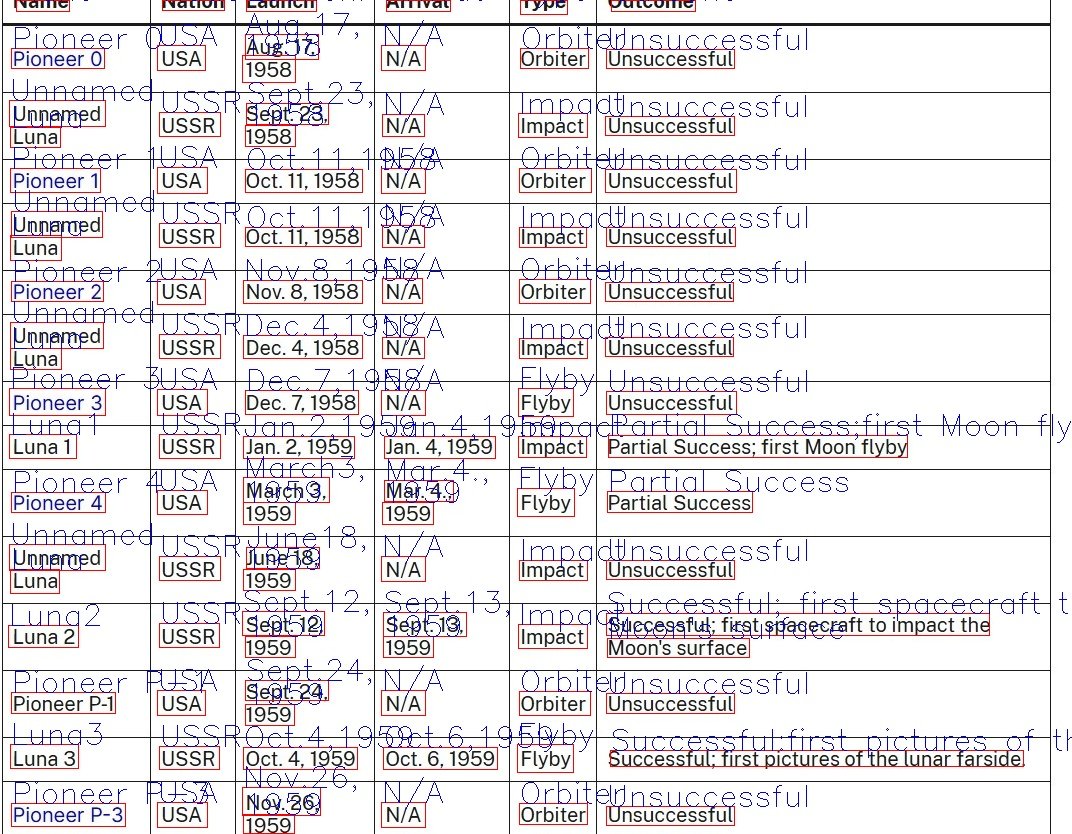

In [ ]:
recogimage = cv2.imread('detections.jpg')
cv2_imshow(recogimage)